# APS1070
#### Project 1 --- Basic Principles and Models
**Deadline: Feb 1st, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Parsa Youssefpour

Student ID: 1004749659

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with the [bodyfat dataset](https://www.openml.org/search?type=data&sort=runs&id=560&status=active). The dataset lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for a number of individuals.


Download it using the cell below:

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml(name='bodyfat', version=1, parser="auto")

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**

* How many features do we have in this dataset? 14
* Determine the median target value. 19.2
* How many participants have a target value greater than the median target value? 125


The percentage of body fat for an individual can be estimated once body density has been determined. Thus, for this project, we'll disregard the `Density` feature to make the body fat percentage prediction more challenging. In this case, you need to delete the `Density` column from the dataset.

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the individuals with a body fat percentage below median or the individuals with a body fat percentage above median. **[0.5]**

In [2]:
import pandas as pd

print("Number of Features in the dataset: ", len(dataset.feature_names))
print("Median of the targets: ", np.median(dataset.target))

targets = pd.Series(dataset.target)
median_value = targets.median()
print("Number of participants with a higher target value than the median: ", (targets > median_value).sum() )

Number of Features in the dataset:  14
Median of the targets:  19.2
Number of participants with a higher target value than the median:  125


In [3]:
#concatinating the dataset.data and dataset.target from the dataset
#deleting the density column
dataset.feature_names.remove("Density")
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["Target"] =  dataset.target

df.describe()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Target
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740
min,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000
50%,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000
75%,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000
max,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


In [4]:
# adding a column to detemine if the target value is more than or less than the median value of 19.2
df["New_Target"] = df['Target'].apply(lambda x: 0 if x < median_value else 1)
df.describe()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Target,New_Target
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794,0.507937
std,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740,0.500932
min,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000,0.000000
25%,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000,0.000000
50%,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000,1.000000
75%,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000,1.000000
max,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000,1.000000


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [5]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
train_feature, test_feature, train_target, test_target = train_test_split(df[dataset.feature_names],df["New_Target"], test_size=0.3, random_state=0, shuffle=True)


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the *Chest circumference (cm)* i.e. ``Chest``, the y-axis is the *Wrist circumference (cm)* i.e. ``Wrist``, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




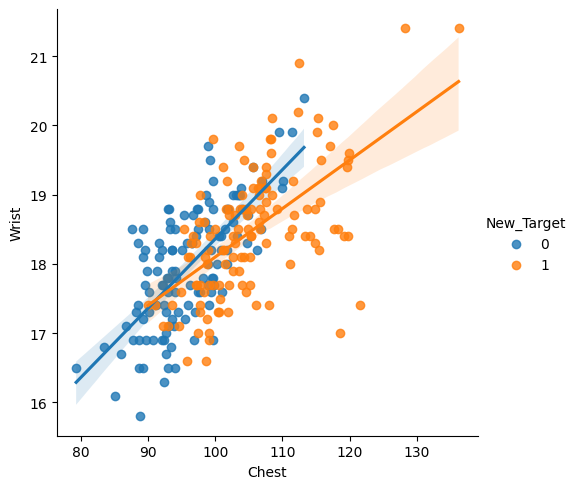

In [ ]:
### YOUR CODE HERE ###
import seaborn
seaborn.lmplot(x="Chest",y= "Wrist", data=df, hue="New_Target", legend=True)

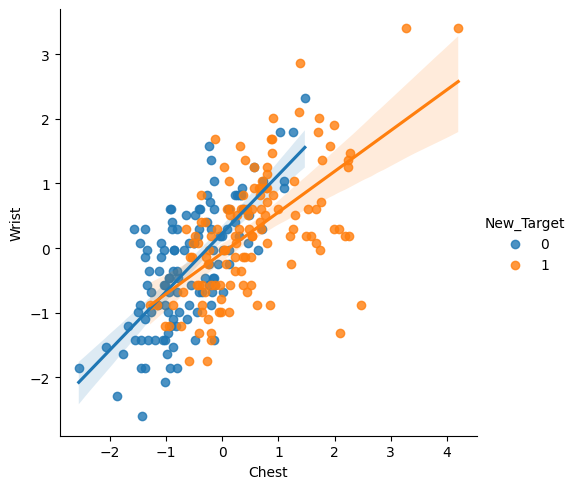

In [ ]:
#standardize data
from sklearn.preprocessing import StandardScaler
std_df = df
std_df[['Chest', 'Wrist']] = StandardScaler().fit_transform(df[['Chest', 'Wrist']])
seaborn.lmplot(x="Chest",y= "Wrist", data=std_df, hue="New_Target", legend=True)

**ANSWER: Overall the graphs, other than the scale of the axes, look the same. They look similar as both the x and y data have gone through a linear transformation when they were standardized. Since KNN uses Euclidean distance as a method of measurement to find the closes points, if one of distance of one of the feature is very large it can dominate the distance measurement. Through standardization, all features have the same scale to avoid this problem. This would result in a better performance of the model.**

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether an individual has a body fat percentage that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**



K: 10 | Train Score: 0.789756838905775 | Test Score: 0.7214285714285713
K: 20 | Train Score: 0.7457142857142858 | Test Score: 0.7274603174603176
K: 30 | Train Score: 0.7301317122593719 | Test Score: 0.716031746031746
K: 40 | Train Score: 0.7372036474164134 | Test Score: 0.7388888888888889
K: 50 | Train Score: 0.7131003039513677 | Test Score: 0.7103174603174603
K: 60 | Train Score: 0.717355623100304 | Test Score: 0.7273015873015873
K: 70 | Train Score: 0.725886524822695 | Test Score: 0.7388888888888889
K: 80 | Train Score: 0.7202026342451875 | Test Score: 0.7331746031746031
K: 90 | Train Score: 0.7273049645390072 | Test Score: 0.7388888888888888
K: 100 | Train Score: 0.7272948328267479 | Test Score: 0.7276190476190476
Best K: 71 | Best Test Score: 0.7503174603174603 | Train Score: 0.718774062816616


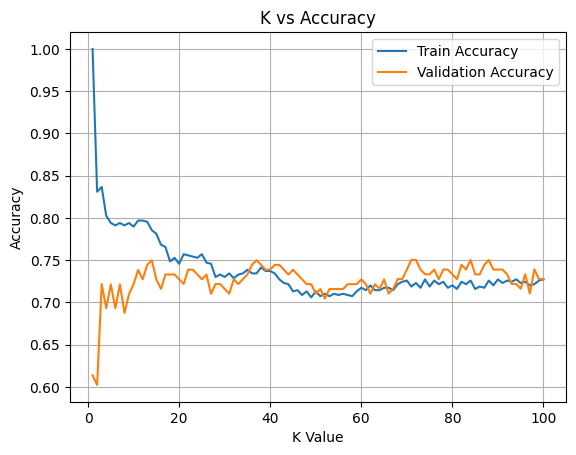

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score

train_scores = np.zeros(100)
test_scores = np.zeros(100)

for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, train_feature, train_target, cv=5, return_train_score=True)
    train_scores[k-1] = np.mean(scores['train_score'])
    test_scores[k-1] = np.mean(scores['test_score'])

    if k % 10 ==0:
        print(f"K: {k} | Train Score: {train_scores[k-1]} | Test Score: {test_scores[k-1]}")
    
best_cross_validation = max(test_scores)
best_k = np.argmax(test_scores)+1
print(f"Best K: {best_k} | Best Test Score: {best_cross_validation} | Train Score: {train_scores[np.argmax(test_scores)]}")


plt.plot(range(1,101),train_scores, label="Train Accuracy")
plt.plot(range(1,101), test_scores, label="Validation Accuracy")
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid(True)
plt.show()

**ANSWER: Based on the graph above, from a k value of 0 to 30 the model is overfitted, while a k value of 30 the both the validation and train accuracy are performing poorly which indicates underfitting.**

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [29]:
from sklearn import tree
import copy
"""
- input train data and target
- find the importance of sample and remove the two least important

"""
def Feature_selector (X_train , y_train , tr=0.95):
### YOUR CODE HERE ###
  x = X_train.copy()
  y = y_train.copy()

  removed_features = []

  best_k, full_cross_val = find_best_k(x, y) 
  best_cross_val = full_cross_val
  best_k_lst = [best_k]
  best_cross_val_lst = [full_cross_val]
  features = copy.deepcopy(list(x.columns))

  dt = tree.DecisionTreeClassifier()

  while len(list(x.columns)) > 1 or best_cross_val < tr * full_cross_val:
    dt.fit(x,y)
    importance = dt.feature_importances_
    
    # removing least important importances
    sorted_importance = sorted(importance)
    min_index = np.where(importance==sorted_importance[0])
    if len(min_index[0]) > 1:
       min_index_2 = min_index[0][1]
       min_index = min_index[0][0]
    else:
      min_index = min_index[0][0]
      min_index_2 = np.where(importance==sorted_importance[1])[0][0] 

    min1_feature = features[min_index]
    min2_feature = features[min_index_2]
 
    removed_features.append(min1_feature)
    removed_features.append(min2_feature)
    
    x = x.drop(columns=[min1_feature, min2_feature])
    features.remove(min1_feature)
    features.remove(min2_feature)

    best_k, best_cross_val = find_best_k(x, y)
    best_k_lst.append(best_k)
    best_cross_val_lst.append(best_cross_val)
  
  return best_cross_val_lst,best_k_lst, removed_features

def find_best_k(data,target):
  ### find the k value with the highest mean cross validation score ###
  best_k = 0 
  best_cross_val = 0 
  for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, data, target, cv=5)
    cross_val_score = np.mean(scores['test_score'])

    if cross_val_score > best_cross_val:
      best_cross_val = cross_val_score
      best_k = k 
  
  return best_k, best_cross_val


In [30]:
cross_val, best_ks, removed_features = Feature_selector(train_feature,train_target)

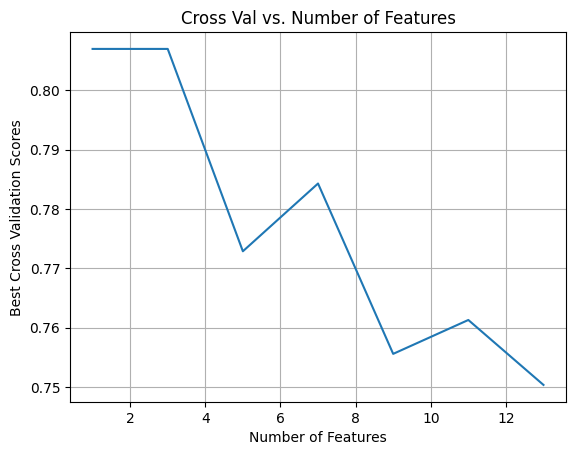

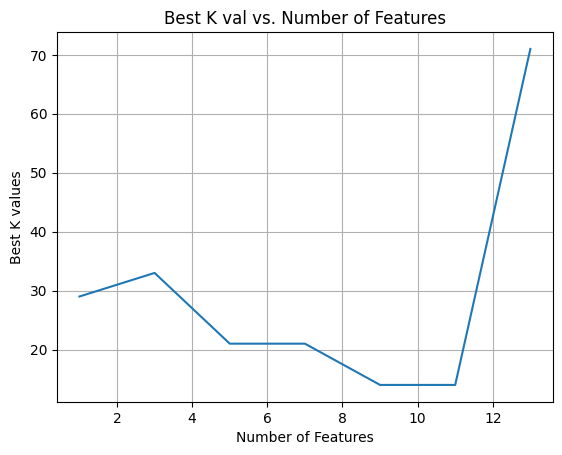

In [67]:
num_features = list(range(len(train_feature.columns), (len(train_feature.columns)-len(removed_features)-1),-2))
plt.plot(num_features,cross_val)
plt.xlabel('Number of Features')
plt.ylabel('Best Cross Validation Scores')
plt.title('Cross Val vs. Number of Features')
plt.grid(True)
plt.show()

plt.plot(num_features,best_ks)
plt.xlabel('Number of Features')
plt.ylabel('Best K values')
plt.title('Best K val vs. Number of Features')
plt.grid(True)
plt.show()

**ANSWER: Based on the graphs above, the model achieves its best accuracy with 3 feature or less. However, with 3 features a higher k values is required compared to 1 feature.**

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [48]:
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler

def standardize(data):
    column_names = data.columns.tolist()
    scaler = StandardScaler()
    scaler.fit(data)
    standardized_data = scaler.transform(data)

    return standardized_data, column_names

standardize_feature, column_names = standardize(train_feature)
standardize_feature =pd.DataFrame(standardize_feature, columns=column_names)
std_cross_val, std_best_ks, std_removed_features = Feature_selector(standardize_feature,train_target)

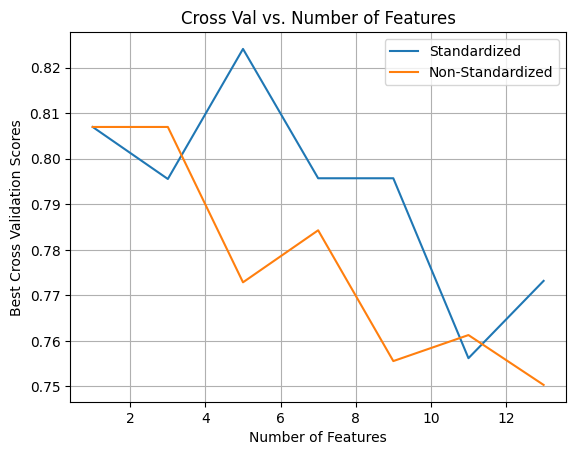

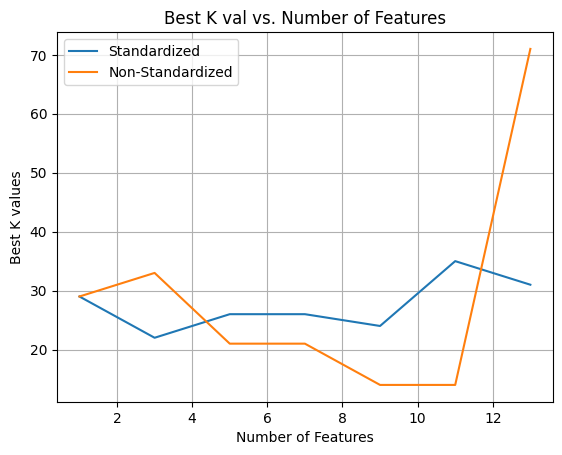

In [51]:
std_num_features = list(range(len(standardize_feature.columns), (len(standardize_feature.columns)-len(std_removed_features)-1),-2))
plt.plot(std_num_features, std_cross_val, label="Standardized")
plt.plot(num_features,cross_val, label="Non-Standardized")
plt.xlabel('Number of Features')
plt.ylabel('Best Cross Validation Scores')
plt.title('Cross Val vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(std_num_features, std_best_ks, label="Standardized")
plt.plot(num_features, best_ks, label="Non-Standardized")
plt.xlabel('Number of Features')
plt.ylabel('Best K values')
plt.title('Best K val vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

**ANSWER: Based on the Cross validation accuracy it can be seen in that model performs significantly better with standardized data. With the model able to achieve a cross validation score of 0.825 with 5 features and a K value of 26. Overall, it can be seen that standardization has improved the model.**

## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [58]:
### Tuning the max_depth and min_sample_split values###
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

standardize_feature, column_names = standardize(train_feature)
standardize_feature =pd.DataFrame(standardize_feature, columns=column_names)

DecisionTree = DecisionTreeClassifier()
param_grid = {
    'max_depth': np.arange(3, 20), 
    'min_samples_split': np.arange(2, 20)  
}

grid_search = GridSearchCV(DecisionTree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(standardize_feature, train_target)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Max Depth: {best_parameters['max_depth']} | Best Min Sample Split: {best_parameters['min_samples_split']} | Best Accuracy Score: {best_score}" )

Best Max Depth: 8 | Best Min Sample Split: 2 | Best Accuracy Score: 0.715873015873016


In [59]:
Best_DecisionTree = DecisionTreeClassifier(max_depth = best_parameters['max_depth'], min_samples_split = best_parameters['min_samples_split'])
DecisionTree_Score = scores = cross_val_score(Best_DecisionTree, standardize_feature, train_target, cv=5) 
DT_cv_mean = DecisionTree_Score.mean()

Best_knn = KNeighborsClassifier(n_neighbors=71)
Knn_Score = cross_val_score(Best_knn, standardize_feature, train_target, cv=5)
Knn_cv_mean = Knn_Score.mean()

print(f"Mean CV score of the Best Decision Tree model: {DT_cv_mean} | Mean CV score of the Best KNN model: {Knn_cv_mean}")

Mean CV score of the Best Decision Tree model: 0.6987301587301588 | Mean CV score of the Best KNN model: 0.7334920634920635


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [76]:
best_features = [item for item in test_feature if item not in std_removed_features]
best_5_features = std_removed_features[-4:]
best_5_features.append(best_features[0])

In [81]:
from sklearn.metrics import accuracy_score

std_test,test_column= standardize(test_feature)
all_std_test_feature =pd.DataFrame(std_test, columns=test_column)
std_train_feature = standardize_feature[best_5_features]
std_test_feature = all_std_test_feature[best_5_features] 

Best_model_knn = KNeighborsClassifier(n_neighbors=26)
Best_model_knn.fit(std_train_feature, train_target)
knn_pred = Best_model_knn.predict(std_test_feature)
knn_accuracy = accuracy_score(test_target,knn_pred)
print(f'KNN Test Accuracy: {round(knn_accuracy*100,2)}%')


KNN Test Accuracy: 82.89%


**ANSWER: The model with the highest CV score was the KNN model with 5 features with a K value of 26. The test accuracy of this model as shown above is 82.89%. This achieved test accuracy is reasonably good however, other model or algorithms that have not been tested in this assignment might be able to produce a better overall test accuracy.**

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/